# Text Tagging

## The Problem

The following experiment was conducted to understand how difficult it is to assign tags to texts. This experiment was conducted as a supervised machine learning task because insppiration was taken from a Tweet from Richard Socher.

![tweet](misc/richard_socher_tweet.png)

The following hypothetical scenario was used when performing this experiment:

A customer service department receives customer **requests for service** through various channels. These could include **e-mails, text messages, and posts on bulletin boards**. The customer service department does not have enough staff members to read through all of these service requests and would like a solution that can **automatically scan** the service requests **and tag** them. Each service request could have **multiple tags** and the tags should be specific enough so that the request can be routed to the appropriate department so that the customers' requests can be attended to.


To conduct this experiment, text reviews from customers were assembled that was posted on the Hello Peter (https://www.hellopeter.com/).
Hello Peter is a website that hosts customer reviews of organizations. An example of a review is shown below.

![review_example](misc/review_example.png)

In our hypothetical scenario we imagine that the following tags would be useful for this customers' concerns to be addressed:
-	Funeral Cover Query
-	Customer Unhappy with Support
-	Customer Mentioned Cancelling Service / Policy
-	Complained about hold time
-	Unhappy Customer

We imagine that if a system could be devised that would automatically generate tags like this, from texts from 
1. the customers, then the customers’ concerns could be attended to more quickly and also 
2. allow the free texts to be aggregated in a meaningful way.

## The Data

A sample of data was collected and tags were manually assigned.

In [58]:
import pandas as pd
pd.reset_option('^display.', silent=True)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [59]:
tagged_data_df = pd.read_csv("./data/tagged_data.csv", sep="\t")
tagged_data_df

,Review_Link,Review_Entity,Review_Title,Review_Detail_Body,Review_Date_Published,Tag_Type,Tag_Value
0,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Service Disconnected
1,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Unexpected Bill Charges
2,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Prolonged Resolution Time
3,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Unhappy With Support
4,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Complained About Agent
5,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Entity,PriceLock DSTv
6,/dstv-multichoice/reviews/-2660613,DStv (MultiChoice),.,"Multi-choice's (DSTV) , self service website i...",2019-01-15 08:38:49,Entity,PriceLock DSTv
7,/dstv-multichoice/reviews/-2660613,DStv (MultiChoice),.,"Multi-choice's (DSTV) , self service website i...",2019-01-15 08:38:49,Label,Unexpected Bill Charges
8,/dstv-multichoice/reviews/-2660613,DStv (MultiChoice),.,"Multi-choice's (DSTV) , self service website i...",2019-01-15 08:38:49,Label,Unhappy With Support
9,/dstv-multichoice/reviews/-2669662,DStv (MultiChoice),???????,"They will call you they will call you, that de...",2019-01-28 09:05:25,Label,Product Not received


In [60]:
# Number of tags
tagged_data_df.shape

(5936, 7)

In [61]:
# Number of unique reviews
len(tagged_data_df["Review_Link"].value_counts())

1394

It can be seen that 5,936 tags have been assigned to 1,394 reviews.

It should be noted that while the reviews were being tagged, two types of tag ('Tag_Type' column) were assigned. These are 'Label' and 'Entity'. The 'Label' tag indicates the tags that we are interested in for this experiment. The 'Entity' tag indicates that the 'Tag_Value' is an identified entity (noun). These entities could be used for building a machine learning classifier for identity entities.

In [62]:
# Number of tags (lables only)
tagged_data_df[tagged_data_df["Tag_Type"]=="Label"].shape

(5294, 7)

Looking at only 'Label' tag types the following can be seen that 5,294 tags have been assigned.
The tags are distributed as follows:

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 101 artists>

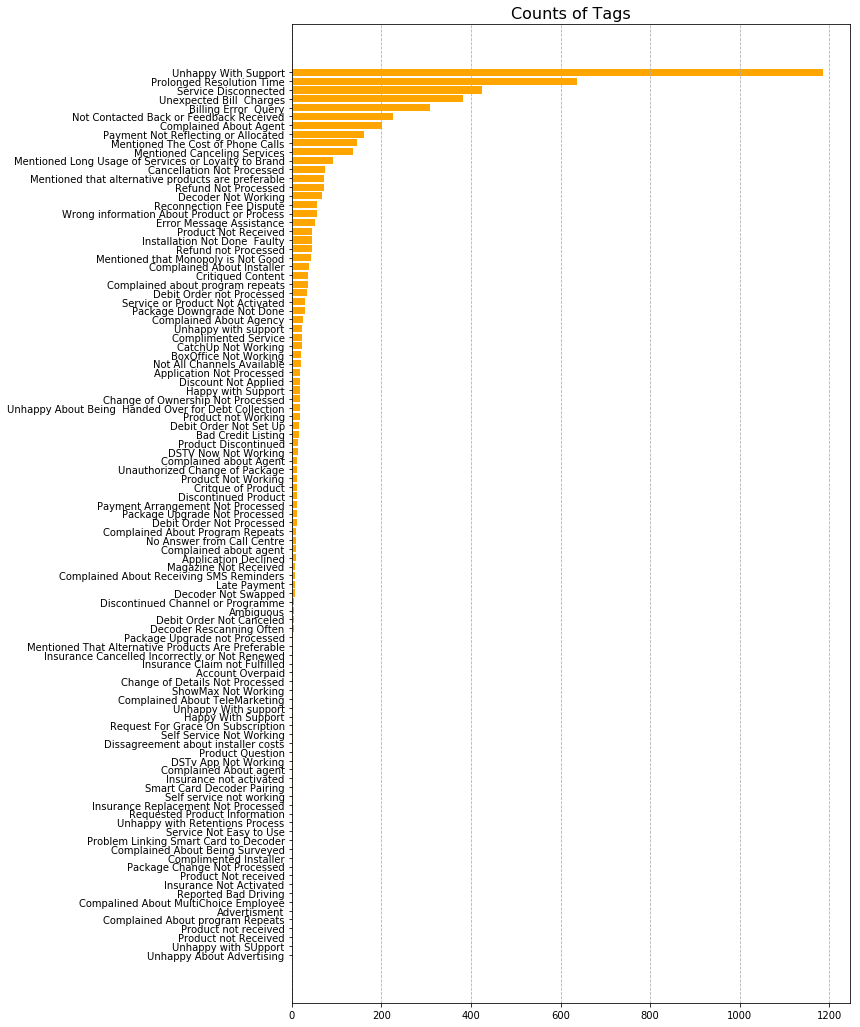

In [64]:
labels = tagged_data_df[tagged_data_df["Tag_Type"]=="Label"]["Tag_Value"].value_counts().sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 18))
ax.set_title("Counts of Tags", fontsize=16)
ax.xaxis.grid(True, linestyle="--")
plt.barh(labels.index, labels.values, color="orange")

There are 101 unique tags. 'Unhappy With Support' is the most frequently occurring tag. Also, many tags occur infrequently. These graphs show that the tags that were assigned are not evenly assigned, **this could affect any machine learning models** built from this data set.

Looking at one review in particular (filter by 'Review_Link' column), it can be seen that the data is not normalized - data repeats like in the 'Review_Entitiy' column. This will have to be transformed for the next stages of this experiment.

In [65]:
tagged_data_df[tagged_data_df["Review_Link"]=="/dstv-multichoice/reviews/-2501141"]

,Review_Link,Review_Entity,Review_Title,Review_Detail_Body,Review_Date_Published,Tag_Type,Tag_Value
0,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Service Disconnected
1,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Unexpected Bill Charges
2,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Prolonged Resolution Time
3,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Unhappy With Support
4,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Label,Complained About Agent
5,/dstv-multichoice/reviews/-2501141,DStv (MultiChoice),????????,On the 12th of April 2018 my DStv account was ...,2018-05-07 22:05:47,Entity,PriceLock DSTv


A helper function is used to prepare the data.

In [66]:
# helper function are contained in the tools.py file
import tools as tools

In [67]:
tagged_data_df = tools.prepare_data(source_file="./data/tagged_data.csv",
                                    min_tag_count=200,
                                    max_tag_count=800,
                                    keep_tag_types=["Label"])

In [68]:
tagged_data_df[tagged_data_df["Review_Link"]=="/dstv-multichoice/reviews/-2501141"]

,Review_Link,Review_Text,Billing Error Query,Complained About Agent,Not Contacted Back or Feedback Received,Prolonged Resolution Time,Service Disconnected,Unexpected Bill Charges
0,/dstv-multichoice/reviews/-2501141,???????? On the 12th of April 2018 my DStv acc...,0,1,0,1,1,1


Looking back at the same record as before, it can be seen that the data are not repeated anymore and the tags have been encoded - 1 for the presence of the tag and 0 for the absence of the tag.

The 'Review_Text' column contains the free-text (unstructured) that will be used to try to predict the tags. We will derive variables (independent variables) from these free-texts.

So, it will be prudent to have a closer look at what is contained in this column.


In [69]:
pd.set_option('display.max_colwidth', 2500)

In [70]:
tagged_data_df[["Review_Text"]].head()

,Review_Text
0,???????? On the 12th of April 2018 my DStv account was disconnected because it was in an arrears and my pay date in the 2nd of each month so from the 2nd tp rhe 12th of April I had DSTv access. On the 29th of April 2018 I paid R1350 to round the figure off because the agent said I need too pay around R1300 and cents. Which I paid because I have a 5year old who is hookes too 303 till 306 but was waiting for a call since the 12th of April 2018 to inform me why I need to pay the full arears amount that initially had to be R949 and not R1300 as my DStv was disconnected and where is the pro rata benefits now because if tables were turn you guys would have wanted your pro rata. I just then checked my balance and it was not yet updated correctly an the agent Sibubsiso advised that no next payment is only due on 2nd of June 2018 with your normal installment but to my suprise when I checked my balance on my account I need to pay R1206.86 now or R1166.15 on 2nd of June 2018. Where is this extra R200 coming from I then asked the agent Refilo that said my account was due for R1460.00 and not R1350 as per my payment but this was the information from an Live Chat agent so ***. Anyway so she advised check a week before you need to pay when your account update and if you then have any prpblems contact us. ( really!!! Now!! What service) on top of all of this I asked her if she can see any eacalation anoit the pro rata payment and why I had to pay a full month extra when my DSTV was disconnected and just blankly ignored me... If she was busy with the escalation you need to inform the client that you going to put the client on hold its ettiquete.. what are guys running a Zoo. Plz dont give my some fake ass excuse and apology. Give me proper copies of my price lock account to ********** and please put my money that I am paying for extra in my account. ********** 111081 S Petersen 429 first avenue Lotus River 7 ********** 873804 August 2018 please come Stacey
1,". Multi-choice's (DSTV) , self service website is the same as the customer care center, useless every time you call in they give you a different story, every time you log on its a different amount to pay. I signed a 24 month price lock contract, have been begging them for documents."
2,011 289 2222 phoned Dstv multichoice yesterday four times to activate the account got cut four times i was given a ref number to use for payment and i was advised that i should pay before 48hours this is a new dstv that was installed yesterday went to Absa bank with the ref given to pay the amount required only to find out the number is incorrect went back to the office phoned them and i spoke to Tholakele Ref number 10333883IS who I explained to her how frustrating this is to take time off work to sort out what's required from you then she gave me an account number to use which shouldn't have been given to me in the first place and she explained to give the account number then the ref number went back again and still the number is incorrect this is so frustrating having to deal with a bunch of people who give false information to customers then after that having to face a penalty because someone couldn't do their job so pissed I could scream .
3,+ 10 calls to activate a service - still not resolved. On Friday the 30th November 2018 my 24 month contract for the explorer (price lock) ended. I received an sms from dstv to contact them to activate a new package and they suspended the contract. Since friday i have made more than 10 calls to the customer service centre to activate the package of my choice and to date they have been unsuccessful in activating a package on my device. It has been escalated numerous times with no resolution even after promises that it will be restored within an hour. Extremely disappointed in dstv multichoice.
4,"10 months in a row, billing issues On the 10th of May 2018, I spoke to a manager there, he told me after being on the phone for an hour, that the arrears due

Looking at these texts, a few things are noted:
- The text data seems to have been processed already. It appears that some **information has been redacted**. These appear as sections containing "***************".
- Some **dates** and **amounts paid** appear. It might be worthwhile to collapse these. For example amounts paid like R1350, R1300, and R200 might be collapsed into '<< money amount >>'. If this is done, it should be considered if we would want to know the separate values when building the tagging system - if individual values are kept this might not be of value to the tagger because specific values are less likely to occur, so a feature built out of such values would be more sparsely populated. This would also apply to dates.
- One of the texts is noticeably **shorter** than the others. This could affect the tagger because if the tagger only takes into account the number of words or phrases in a particular text,  to predict the tags, the number of words and phrases will be generally smaller in shorter texts. Some form of normalization might benefit the tagger.
- **Reference numbers** appear in some of the texts. These reference numbers are presumably unique to the customers' query and are hence not likely to reoccur and would make for poor predictions of tags because features built of these references are likely to occur once only - the correlation with any tags that occur fairly frequently would be small.


It was decided to first build a complete tagger, before addressing the things noted above. The output of the tagger and the features that were used will be reviewed and then adjustments will be made addressing the points above. In such a way the effect of any adjustments on the performance of the tagger can be observed.

## The Model

To measure the performance of the model (tagger) that will be built it was decided to use the Receiver Operating Characteristic (ROC) Curve to measure performance of the model. The ROC Curve plots different thresholds for the False Positive Rate (x-axis) and True Positive Rate (y-axis) so that a range of rates can be examined. This was considered to be good for this experiment because no single false positive or true positive rate was targeted in this experiment. If at a later stage a particular threshold is desired then the model would have to be built that optimizes for that, specifically.

The ROC curve also comes along with a measure called the  Area Under the Curve (AUC). The closer this value is to 1.0, the better the model is performing at predicting that tag (label). An AUC score of 0.5 indicates that the model does no better than randomly guessing whether the tag should be present or not.
